In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (5, 5)

In [6]:
# data inlezen
nb = pd.read_csv('/home/jvdzwaan/data/dilipad/CAP/vragenuurtje_performance_nb.csv', encoding='utf-8', index_col=0)
svm = pd.read_csv('/home/jvdzwaan/data/dilipad/CAP/vragenuurtje_performance_svm.csv', encoding='utf-8', index_col=0)
parties = pd.read_csv('/home/jvdzwaan/data/dilipad/CAP/parties_vragenuurtje_results/performance_tm.csv', encoding='utf-8', index_col=0)
parties_time = pd.read_csv('/home/jvdzwaan/data/dilipad/CAP/parties_through_time_vragenuurtje_results/performance_tm.csv', encoding='utf-8', index_col=0)

In [52]:
data = {'mean accuracy': [np.mean(nb['accuracy']), np.mean(svm['accuracy']), np.mean(parties['accuracy']), np.mean(parties_time['accuracy'])],
        'std accuracy': [np.std(nb['accuracy']), np.std(svm['accuracy']), np.std(parties['accuracy']), np.std(parties_time['accuracy'])],
        'mean F1': [np.mean(nb['F1']), np.mean(svm['F1']), np.mean(parties['F1']), np.mean(parties_time['F1'])],
        'std F1': [np.std(nb['F1']), np.std(svm['F1']), np.std(parties['F1']), np.std(parties_time['F1'])]}
df = pd.DataFrame(data, index=['naive bayes', 'svm', 'parties', 'parties time'])
df

,mean F1,mean accuracy,std F1,std accuracy
naive bayes,0.377031,0.447170,0.028250,0.026455
svm,0.585190,0.602689,0.032434,0.030172
parties,0.510906,0.511871,0.008132,0.007649
parties time,0.548317,0.550120,0.008439,0.007503


In [62]:
print np.round(df[['mean accuracy', 'std accuracy', 'mean F1', 'std F1']], decimals=3).to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &  mean accuracy &  std accuracy &  mean F1 &  std F1 \\
\midrule
naive bayes  &          0.447 &         0.026 &    0.377 &   0.028 \\
svm          &          0.603 &         0.030 &    0.585 &   0.032 \\
parties      &          0.512 &         0.008 &    0.511 &   0.008 \\
parties time &          0.550 &         0.008 &    0.548 &   0.008 \\
\bottomrule
\end{tabular}



P value ANOVA: 0.0000000000

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
   group1       group2    meandiff lower  upper  reject
-------------------------------------------------------
naive bayes    parties     0.1339  0.1035 0.1642  True 
naive bayes  parties_time  0.1713  0.1409 0.2017  True 
naive bayes      svm       0.2082  0.1731 0.2432  True 
  parties    parties_time  0.0374  0.0126 0.0622  True 
  parties        svm       0.0743  0.0439 0.1047  True 
parties_time     svm       0.0369  0.0065 0.0672  True 
-------------------------------------------------------


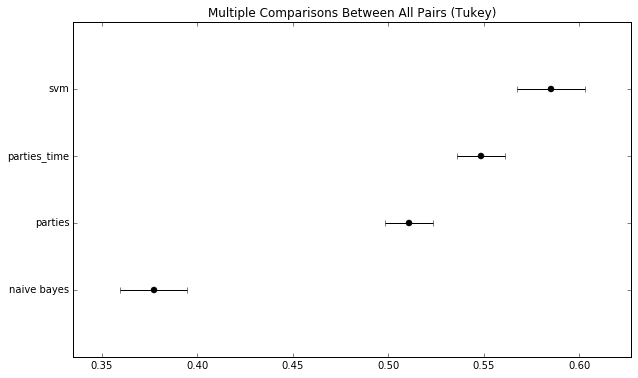

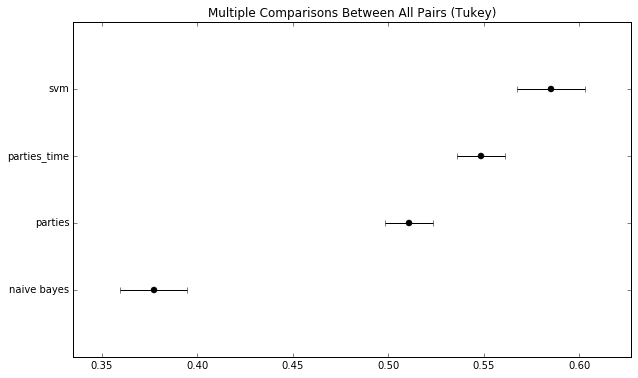

In [25]:
def do_anova(l1, l2, l3, l4, alpha=0.05): 
    f_val, p_val = stats.f_oneway(l1, l2, l3, l4)
    print "P value ANOVA: {:10.10f}\n".format(p_val)
    
    if p_val < 0.05:
        values = list(l1) + list(l2) + list(l3) + list(l4)
        #print values
        #print len(values)
        names = ['naive bayes' for i in range(len(l1))] + ['svm' for i in range(len(l2))] + ['parties' for i in range(len(l3))] + ['parties_time' for i in range(len(l4))]
        #print names
        #print len(names)
        result = sm.stats.multicomp.pairwise_tukeyhsd(np.array(values), names, alpha=alpha)
        print(result.summary())
        return result
result = do_anova(nb['F1'].values, svm['F1'].values, parties['F1'].values, parties_time['F1'].values)
result.plot_simultaneous()

P value ANOVA: 0.0000000000

   Multiple Comparison of Means - Tukey HSD,FWER=0.01   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
naive bayes    parties     0.1339   0.0958 0.172   True 
naive bayes  parties_time  0.1713   0.1332 0.2094  True 
naive bayes      svm       0.2082   0.1642 0.2521  True 
  parties    parties_time  0.0374   0.0063 0.0685  True 
  parties        svm       0.0743   0.0362 0.1124  True 
parties_time     svm       0.0369  -0.0012 0.075  False 
--------------------------------------------------------


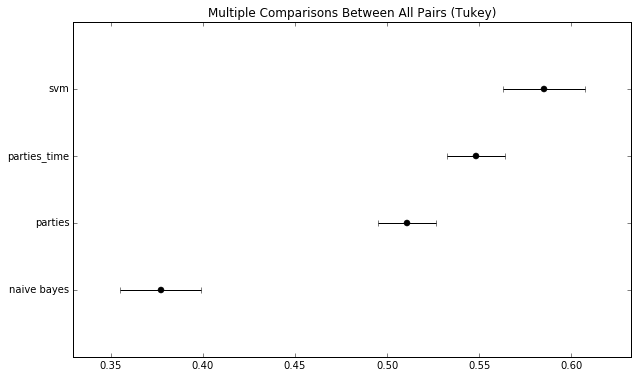

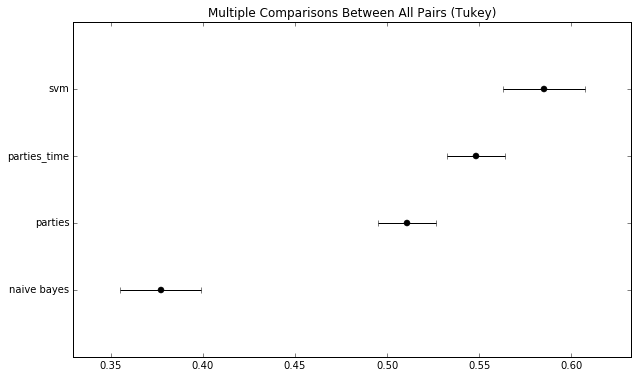

In [49]:
result = do_anova(nb['F1'].values, svm['F1'].values, parties['F1'].values, parties_time['F1'].values, alpha=0.01)
result.plot_simultaneous()

P value ANOVA: 0.0000000000

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
   group1       group2    meandiff lower  upper  reject
-------------------------------------------------------
naive bayes    parties     0.0647  0.0364 0.093   True 
naive bayes  parties_time  0.1029  0.0747 0.1312  True 
naive bayes      svm       0.1555  0.1229 0.1882  True 
  parties    parties_time  0.0382  0.0152 0.0613  True 
  parties        svm       0.0908  0.0626 0.1191  True 
parties_time     svm       0.0526  0.0243 0.0808  True 
-------------------------------------------------------


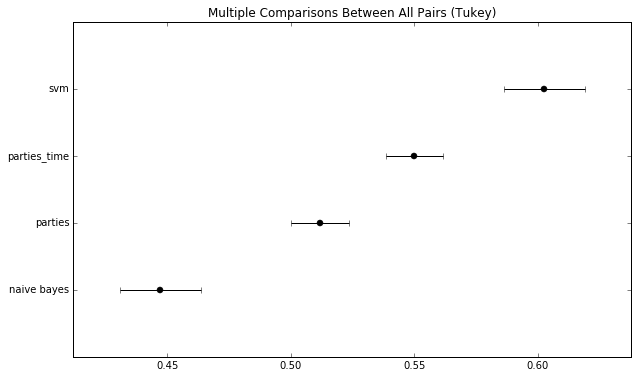

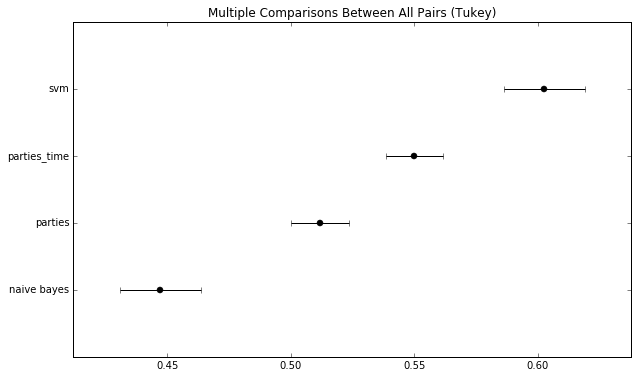

In [29]:
result = do_anova(nb['accuracy'].values, svm['accuracy'].values, parties['accuracy'].values, parties_time['accuracy'].values)
result.plot_simultaneous()

P value ANOVA: 0.0000000000

   Multiple Comparison of Means - Tukey HSD,FWER=0.01  
   group1       group2    meandiff lower  upper  reject
-------------------------------------------------------
naive bayes    parties     0.0647  0.0293 0.1001  True 
naive bayes  parties_time  0.1029  0.0675 0.1384  True 
naive bayes      svm       0.1555  0.1146 0.1964  True 
  parties    parties_time  0.0382  0.0093 0.0672  True 
  parties        svm       0.0908  0.0554 0.1263  True 
parties_time     svm       0.0526  0.0171 0.088   True 
-------------------------------------------------------


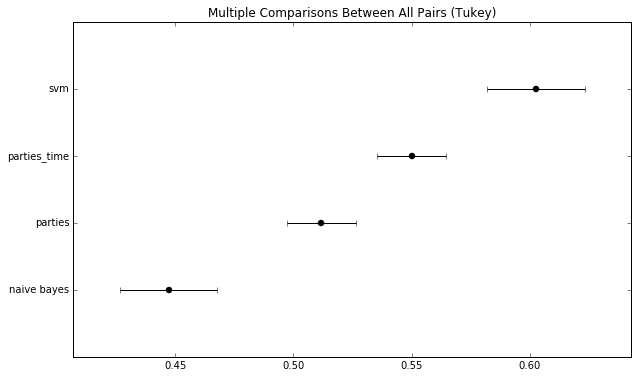

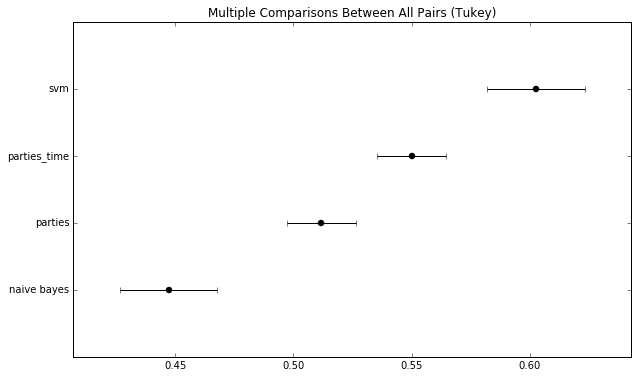

In [30]:
result = do_anova(nb['accuracy'].values, svm['accuracy'].values, parties['accuracy'].values, parties_time['accuracy'].values, alpha=0.01)
result.plot_simultaneous()

In [50]:
from scipy.stats import ttest_ind
from itertools import combinations

data = {'naive bayes': nb,
        'svm': svm,
        'parties': parties,
        'parties time': parties_time}

statistic = 'F1'
alpha = 0.01

for p1, p2 in combinations(data.keys(), 2):
    print p1, 'vs.', p2
    t, prob = ttest_ind(data[p1][statistic].values, data[p2][statistic].values, equal_var=False)
    if prob < alpha:
        print 'statistically significant; p < {}'.format(alpha)
    print

parties time vs. svm

parties time vs. naive bayes
statistically significant; p < 0.01

parties time vs. parties
statistically significant; p < 0.01

svm vs. naive bayes
statistically significant; p < 0.01

svm vs. parties
statistically significant; p < 0.01

naive bayes vs. parties
statistically significant; p < 0.01

